In [1]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf

In [2]:
stocks_df = pd.read_csv("../data/EQUITY_L.csv")

In [3]:
stocks_df.sample(5)

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE
397,COLPAL,Colgate Palmolive (India) Limited,EQ,17-DEC-2007,1,1,INE259A01022,1
479,DHRUV,Dhruv Consultancy Services Limited,BE,25-NOV-2021,10,1,INE506Z01015,10
928,JAYSREETEA,Jayshree Tea & Industries Limited,EQ,15-FEB-1995,5,1,INE364A01020,5
548,EMCURE,Emcure Pharmaceuticals Limited,EQ,10-JUL-2024,10,1,INE168P01015,10
963,JTEKTINDIA,Jtekt India Limited,EQ,12-JAN-2004,1,1,INE643A01035,1


In [4]:
stock = yf.Ticker("RELIANCE.NS")

In [5]:
for news in stock.get_news(count=10, tab='all'):
    print(f"{news['content']['pubDate'][:10]}\nsummary:  {news['content']['summary']}\n")
# stock.news[0]

2025-08-07
summary:  (Bloomberg) -- India’s state-owned oil refiners are pulling back from purchases of Russian crude for now, according to people with direct knowledge of the companies’ procurement plans, as Washington ratchets up the pressure on New Delhi over the flows with a wave of harsh tariffs.Most Read from BloombergAll Hail the Humble Speed HumpThree Deaths Reported as NYC Legionnaires’ Outbreak SpreadsMayor Asked to Explain $1.4 Billion of Wasted Johannesburg FundsMajor Istanbul Projects Are Stalling as Ci

2025-08-06
summary:  NEW DELHI (Reuters) -Indian refiners are awaiting government directions on whether to continue buying Russian oil after the United States decided to impose fresh 25% tariffs on Indian goods over New Delhi's energy ties with Russia, four industry sources said.  The new duties, aimed at penalising India for its Russian oil imports, come on top of existing tariffs Washington has levied to fix its trade deficit with the South Asian nation.  India said the 

In [31]:
info = stock.info

In [33]:
list(info.keys())

['address1',
 'address2',
 'city',
 'zip',
 'country',
 'phone',
 'fax',
 'website',
 'industry',
 'industryKey',
 'industryDisp',
 'sector',
 'sectorKey',
 'sectorDisp',
 'longBusinessSummary',
 'fullTimeEmployees',
 'companyOfficers',
 'compensationAsOfEpochDate',
 'executiveTeam',
 'maxAge',
 'priceHint',
 'previousClose',
 'open',
 'dayLow',
 'dayHigh',
 'regularMarketPreviousClose',
 'regularMarketOpen',
 'regularMarketDayLow',
 'regularMarketDayHigh',
 'dividendRate',
 'dividendYield',
 'exDividendDate',
 'payoutRatio',
 'fiveYearAvgDividendYield',
 'beta',
 'trailingPE',
 'volume',
 'regularMarketVolume',
 'averageVolume',
 'averageVolume10days',
 'averageDailyVolume10Day',
 'bid',
 'ask',
 'bidSize',
 'askSize',
 'marketCap',
 'fiftyTwoWeekLow',
 'fiftyTwoWeekHigh',
 'priceToSalesTrailing12Months',
 'fiftyDayAverage',
 'twoHundredDayAverage',
 'trailingAnnualDividendRate',
 'trailingAnnualDividendYield',
 'currency',
 'tradeable',
 'enterpriseValue',
 'forwardPE',
 'profitMargi

In [35]:
info['shortBusinessSummary']

KeyError: 'shortBusinessSummary'

In [26]:
# Read the CSV that contains the keys to keep
keys_df = pd.read_csv("../important_keys.csv", header=None)
# The file is one row of comma-separated values, so flatten it into a set
keys_to_keep = set(keys_df.iloc[0].dropna().tolist())

In [28]:
# Filter dictionary
filtered_dict = {k: v for k, v in info.items() if k in keys_to_keep}

print(filtered_dict)

{'industry': 'Credit Services', 'sector': 'Financial Services', 'previousClose': 877.15, 'open': 877.15, 'dayLow': 876.95, 'dayHigh': 884.0, 'regularMarketDayLow': 876.95, 'regularMarketDayHigh': 884.0, 'dividendRate': 4.4, 'dividendYield': 0.5, 'exDividendDate': 1748563200, 'payoutRatio': 0.1568, 'beta': 0.476, 'volume': 193993, 'regularMarketVolume': 193993, 'averageVolume': 8281888, 'averageVolume10days': 6505345, 'bid': 880.55, 'ask': 881.4, 'bidSize': 0, 'askSize': 0, 'marketCap': 5470945280000, 'fiftyTwoWeekLow': 642.5, 'fiftyTwoWeekHigh': 978.8, 'priceToSalesTrailing12Months': 14.109255, 'fiftyDayAverage': 920.134, 'twoHundredDayAverage': 831.72107, 'trailingAnnualDividendYield': 0.005016246, 'currency': 'INR', 'enterpriseValue': 8271779856384, 'forwardPE': 21.748983, 'profitMargins': 0.44939, 'floatShares': 2640162674, 'sharesOutstanding': 6212389888, 'heldPercentInsiders': 0.54977, 'heldPercentInstitutions': 0.25524, 'impliedSharesOutstanding': 6213100032, 'bookValue': 155.752

In [27]:
stock.income_stmt

,2025-03-31,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Tax Effect Of Unusual Items,-5.093012e+06,-2.519447e+06,-1.097182e+05,-4.972111e+06,NaN
Tax Rate For Calcs,2.444220e-01,2.705010e-01,2.663060e-01,2.707970e-01,NaN
Normalized EBITDA,1.143639e+09,1.013353e+09,7.895870e+08,7.640670e+08,NaN
Total Unusual Items,-2.083700e+07,-9.314000e+06,-4.120000e+05,-1.836100e+07,NaN
Total Unusual Items Excluding Goodwill,-2.083700e+07,-9.314000e+06,-4.120000e+05,-1.836100e+07,NaN
Net Income From Continuing Operation Net Minority Interest,6.237630e+08,5.606980e+08,4.181910e+08,3.458540e+08,NaN
Reconciled Depreciation,1.825840e+08,1.434920e+08,1.195700e+08,1.367190e+08,NaN
Reconciled Cost Of Revenue,5.845041e+09,4.989029e+09,4.469182e+09,3.890973e+09,NaN
EBITDA,1.122802e+09,1.004039e+09,7.891750e+08,7.457060e+08,NaN
EBIT,9.402180e+08,8.605470e+08,6.696050e+08,6.089870e+08,NaN


In [19]:
stock.balance_sheet

,2025-03-31,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Ordinary Shares Number,6.883901e+08,6.883901e+08,6.883901e+08,6.883901e+08,NaN
Share Issued,6.883901e+08,6.883901e+08,6.883901e+08,6.883901e+08,NaN
Net Debt,NaN,NaN,NaN,4.612900e+09,6.204000e+09
Total Debt,1.499800e+09,1.502600e+09,1.523200e+09,6.288500e+09,NaN
Tangible Book Value,7.935450e+10,7.166670e+10,6.526280e+10,5.199620e+10,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,1.658040e+10,9.159800e+09,6.747000e+09,2.200000e+08,NaN
Other Short Term Investments,1.331180e+10,2.297000e+08,1.614000e+08,2.220000e+07,NaN
Cash And Cash Equivalents,3.268600e+09,9.159800e+09,6.747000e+09,1.978000e+08,NaN
Cash Equivalents,NaN,7.957300e+09,6.247600e+09,0.000000e+00,2.610200e+09


In [20]:
stock.cashflow

,2025-03-31,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Free Cash Flow,1.054130e+10,7.969000e+09,1.288760e+10,2.954400e+09,NaN
Repayment Of Debt,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-1.101610e+10
Capital Expenditure,-7.517300e+09,-8.371400e+09,-1.086730e+10,-1.366300e+10,NaN
End Cash Position,3.268600e+09,9.159800e+09,6.747000e+09,1.663000e+08,NaN
Beginning Cash Position,9.159800e+09,6.747000e+09,1.663000e+08,2.768600e+09,NaN
Changes In Cash,-5.891200e+09,2.412800e+09,6.580700e+09,-2.602300e+09,NaN
Financing Cash Flow,-4.737300e+09,-5.141100e+09,-6.783700e+09,-6.284400e+09,NaN
Interest Paid Cff,-2.991000e+08,-2.732000e+08,-3.814000e+08,-5.314000e+08,NaN
Cash Dividends Paid,-3.890700e+09,-4.574900e+09,-1.378500e+09,-1.374700e+09,NaN
Common Stock Dividend Paid,NaN,-4.574900e+09,-1.378500e+09,-1.374700e+09,NaN


In [21]:
stock.recommendations_summary

,period,strongBuy,buy,hold,sell,strongSell
0,0m,2,6,6,4,8
1,-1m,2,6,6,4,8
2,-2m,2,6,6,4,8


In [25]:
yf.Search("GUJGASLTD.NS").response

{'explains': [],
 'count': 9,
 'quotes': [{'exchange': 'NSI',
   'shortname': 'GUJARAT GAS LIMITED',
   'quoteType': 'EQUITY',
   'symbol': 'GUJGASLTD.NS',
   'index': 'quotes',
   'score': 10000500.0,
   'typeDisp': 'Equity',
   'longname': 'Gujarat Gas Limited',
   'exchDisp': 'NSE',
   'sector': 'Utilities',
   'sectorDisp': 'Utilities',
   'industry': 'Utilities—Regulated Gas',
   'industryDisp': 'Utilities—Regulated Gas',
   'isYahooFinance': True}],
 'news': [{'uuid': '8181276a-0de0-31bc-b701-240adcb13b0b',
   'title': 'Ramaco Resources Inc (METC) Q2 2025 Earnings Call Highlights: Strategic Shift to Dual Platform ...',
   'publisher': 'GuruFocus.com',
   'link': 'https://finance.yahoo.com/news/ramaco-resources-inc-metc-q2-170039408.html',
   'providerPublishTime': 1754326839,
   'type': 'STORY',
   'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/CxhJPZ.PTQhU_4BvYJFypw--~B/aD0xODA7dz0xODA7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/us.finance.gurufocus

In [10]:
history = stock.history(period='max')
history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-09-15 00:00:00+05:30,127.900498,127.900498,121.505470,121.505470,48555,0.0,0.0
2015-09-16 00:00:00+05:30,115.430191,115.430191,115.430191,115.430191,22865,0.0,0.0
2015-09-18 00:00:00+05:30,109.665276,109.665276,109.665276,109.665276,17750,0.0,0.0
2015-09-21 00:00:00+05:30,106.458362,109.665283,104.182487,104.182487,195240,0.0,0.0
2015-09-22 00:00:00+05:30,98.981817,102.019457,98.981817,100.194992,396950,0.0,0.0


In [16]:
history.loc['2017-07']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-07-03 00:00:00+05:30,120.446929,121.688182,111.781183,120.515884,28891226,0.0,0.0
2017-07-04 00:00:00+05:30,121.136527,124.538461,120.906667,121.964020,8969060,0.0,0.0
2017-07-05 00:00:00+05:30,122.239847,122.515682,120.515893,121.343399,3755496,0.0,0.0
2017-07-06 00:00:00+05:30,121.550257,137.180775,120.630815,135.112030,34800662,0.0,0.0
2017-07-07 00:00:00+05:30,133.365102,158.511839,133.319127,152.236649,76442380,0.0,0.0
2017-07-10 00:00:00+05:30,154.006599,167.706285,154.006599,162.810257,17690766,0.0,0.0
2017-07-11 00:00:00+05:30,164.442263,177.636252,164.442263,175.475571,46822522,0.0,0.0
2017-07-12 00:00:00+05:30,180.739349,188.025932,179.567066,185.704346,35755930,0.0,0.0
2017-07-13 00:00:00+05:30,191.703723,204.254105,187.750118,204.254105,31793634,0.0,0.0


In [13]:
history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

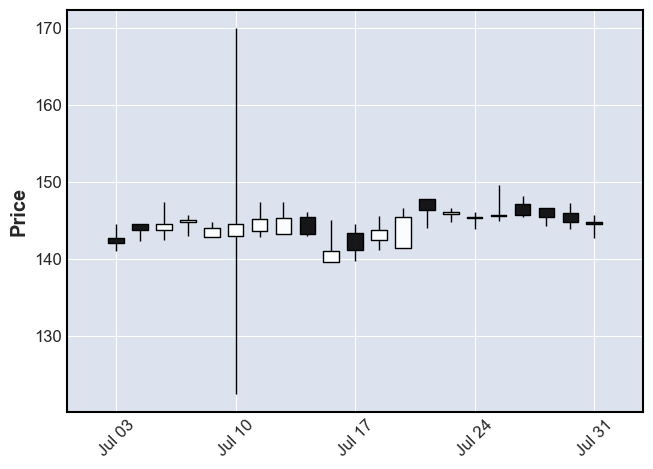

In [11]:
mpf.plot(history[['Open', 'High', 'Low', 'Close', 'Volume']].loc['2017-07'],type='candle')

## Gathering Data

### 1. Valuation Metrics